In [2]:
%%html
<style>
table {
    margin-left: 30pt !important;
    margin-right: auto !important;
    display: block;
}
</style>

<a id='top'></a>

# Code to generate Figure panels related to Figure 3

#### Goldschmidt et al. 2026, "Recent experience and internal state shape local search strategies in flies"
---

<a id='toc'></a>
## Table of Contents

- [Imports](#imports)
- [Figure 3](#figure-3)

| Figure Panel  | Title | Status |
| ------------- | ------------- | :-----------: |
| [Fig. 3B](#fig-3b)  | Absolute turn bias for 24-h-starved, and 40-h-starved wild type flies calculated over short and long trips  |✅|
| [Fig. 3C](#fig-3c)  | Probability distribution of $log_{10}$ run lengths for 24-h-starved, and 40-h-starved wild type flies |✅|
| [Fig. 3D](#fig-3d)  | Probability distribution of absolute turn sizes for 24-h-starved, and 40-h-starved wild type flies  |✅|
| [Fig. 3E](#fig-3e)  | Probability distribution of $log_{10}$ turn radii for 24-h-starved, and 40-h-starved wild type flies  |✅|
| [Fig. 3F](#fig-3f)  | Probability distribution of $log_{10}$ run lengths for short and long trips in 24-h-starved wild type flies  |✅|
| [Fig. 3G](#fig-3g)  | Probability distribution of absolute turn sizes for short and long trips in 24-h-starved wild type flies  |✅|
| [Fig. 3H](#fig-3h)  | Probability distribution of $log_{10}$ turn radii for short and long trips in 24-h-starved wild type flies  |✅|
| [Fig. 3I](#fig-3i)  | Change of run lengths as a function of path distance from the last food visit  |✅|
| [Fig. 3J](#fig-3i)  | Change of absolute turn angles as a function of path distance from the last food visit  |✅|
| [Fig. 3K](#fig-3i)  | Change of turn radii as a function of path distance from the last food visit  |✅|

- [Supplemental Figure 3](#figure-s3)

| Figure Panel  | Title | Status |
| ------------- | ------------- | :-----------: |
| [Fig. S3A](#fig-s3a)  | Absolute turn bias for all wild type experimental groups, calculated per fly before (left) and after (right) the first visit to the food spot  |✅|
| [Fig. S3B](#fig-s3b)  | Absolute turn bias for all wild type experimental groups, calculated per fly after the first food visit (like in A) but here splitting long and short trips  |✅|
| [Fig. S3C](#fig-s3c)  | Turn bias for all wild type experimental groups calculated per fly after the first food visit  |✅|
| [Fig. S3G](#fig-s3g)  | Shape, location and scale parameters (function fit) of run length distribution before and after first food visit  |✅|
| [Fig. S3H](#fig-s3h)  | Shape, location and scale parameters obtained from fits to the run length distribution between short and long trips (after first food visit) |✅|
| [Fig. S3I](#fig-s3i)  | Same as S3G, H, but for the distribution of absolute turn angles  |✅|
| [Fig. S3J](#fig-s3j)  | Same as S3G, H, but for the distribution of absolute turn angles  |✅|
| [Fig. S3K](#fig-s3k)  | Same as S3G, H, but for the distribution of turn radii  |✅|
| [Fig. S3L](#fig-s3l)  | Same as S3G, H, but for the distribution of turn radii  |✅|
| [Fig. S3M](#fig-3i)  | Change of run lengths as a function of path distance from the last food visit for sucrose and agarose trials  |✅|
| [Fig. S3N](#fig-3i)  | Change of absolute turn angles as a function of path distance from the last food visit for sucrose and agarose trials  |✅|
| [Fig. S3O](#fig-3i)  | Change of turn radii as a function of path distance from the last food visit for sucrose and agarose trials  |✅|

<a id='imports'></a>
## Imports

In [31]:
from itertools import combinations
import os
import os.path as op
from os import getcwd, makedirs
from os.path import sep, split
from os import getcwd, makedirs

import pandas as pd
import numpy as np
import io, yaml
from src.helper import rle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from src.viz import seg_label, etho_label, seg_color, etho_color, myAxisTheme, pal, trip_color, cond_color
from src.viz import condition_palette as pal_con
from src.makedataframe import getDataPerGroup, makeLoopDf, makeLoopDepartureStatsDf, addExpInfo, makePerMoveSegmentDF, computeTurnAngBetween2angles
from src.per_trips import get_trip_df, extractGaussianIntersects, fitGMM

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
%config Completer.use_jedi = False

plotDir = op.join('plt', 'paper_src')
makedirs(plotDir, exist_ok=True)

<a id='figure-3'></a>
## Figure 3

## Load data

In [21]:
# Select data:
rootDir = './dat/'
rawfiles = ['JR_CantonSMH_single_dark_5ul_perframe_0-125M_24hr',
            'JR_CantonSMH_single_dark_5ul_perframe_0-125M_40hr',
            'JR_CantonSMH_single_dark_5ul_perframe_0M_24hr',
            'JR_CantonSMH_single_dark_5ul_perframe_0M_40hr',
            ]
#procfiles = []

with np.errstate(divide='ignore') and pd.option_context('mode.chained_assignment', None):
    datDf, metadata = getDataPerGroup(rootDir, rawfiles) 
conditions = list(np.unique(datDf.condition.values))
flyids = list(np.unique(datDf.flyid.values))

dataset_name = 'allJR_WT'
tripfilename = op.join('dat', dataset_name, f'tripDf_{dataset_name}.csv')

if op.exists(tripfilename):
    print(tripfilename, 'exists.')
else:
    print(tripfilename, 'does not exists.')
os.makedirs(op.dirname(tripfilename), exist_ok=True)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

/Users/golddenn/Documents/GitHub/foraging-analysis/src/makedataframe.py:95: RuntimeWarning: invalid value encountered in divide
  datDf['cff'] = np.divide(datDf.fed.values, datDf.time.values)


dat/allJR_WT/tripDf_allJR_WT.csv exists.


## Calculate per-trip dataframe

In [22]:
if op.exists(tripfilename): #load trip dataframe
    per_trip_df = pd.DataFrame()
    print(f'Loading per-trip data from {tripfilename}')
    df = pd.read_csv(tripfilename).drop(columns = ['Unnamed: 0'])
    per_trip_df = pd.concat([per_trip_df, df])
else: 
    per_trip_df = get_trip_df(datDf, metadata)
    
    """
    Classify into long vs short based on extracted thresholds 
    
    TODO:
    - move this into trip analysis module
    """
    qOIs = ['duration','scaled_duration','scaled_duration_loop','length', 'scaled_length','scaled_length_loop']
    qSlct = 4#1
    condsOI = conditions
    segThr = 5
    fit_type = 'GMM'
    fitparams = {  
        "Nmin": 2,
        "Nmax": 2,
    }
    triptype_df = pd.DataFrame({'genotype':[], 'flyid':[],'condition':[], 'trip_index':[], 'duration':[],'scaled_duration':[], 'length':[], 'scaled_length':[],'scaled_length_loop':[]})
    log10qthresMat = np.zeros((len(condsOI),len(qOIs)))
    print('genotypes:', datDf['genotype'].unique())
    genotype = datDf['genotype'].unique()[0]
    for c, condOI in enumerate(condsOI):
        for q, qOI in enumerate(qOIs):
            qVec = per_trip_df.query(f'condition == "{condOI}"')[qOI].values
            if q==qSlct: print(qOI)
            if len(qVec) == 0: continue
            qVec = qVec[~np.isnan(qVec)]
            data_curr = np.log10(qVec[qVec>0])
            data_curr = data_curr.reshape(-1,1)
            xthres = extractGaussianIntersects(data_curr)
            log10qthresMat[c,q] = xthres[0]
        mydf = per_trip_df.query(f'condition == "{condOI}"')[['flyid','condition','trip_index', 'duration','scaled_duration','length','scaled_length','scaled_length_loop', 'runturnsegs']]
        trip_threshold = 10**log10qthresMat[c,qSlct]
        triptype = np.where(mydf[qOIs[qSlct]].values <= trip_threshold, 'short', 'long') 
        tripseglen = mydf.runturnsegs.values
        triptype2 = ['very short' if (tripseglen[i] <= segThr and triptype[i]=='short') else triptype[i] for i in range(len(triptype))]
        mydf['genotype'] = genotype
        mydf['triptype'] = triptype
        mydf['triptype_vs'] = triptype2
        triptype_df = pd.concat((triptype_df,mydf))
    print(log10qthresMat)
    per_trip_df['genotype'] = genotype
    per_trip_df = pd.merge(per_trip_df, triptype_df, on=['genotype','flyid','condition', 'trip_index','duration','scaled_duration','length','scaled_length' ,'scaled_length_loop', 'runturnsegs'])
    print(per_trip_df.columns)
    per_trip_df['log10_duration'] = np.log10(per_trip_df.duration.values)
    per_trip_df['log10_scaled_duration'] = np.log10(per_trip_df.scaled_duration.values)
    per_trip_df['log10_length'] = np.log10(per_trip_df.length.values)
    per_trip_df['log10_scaled_length'] = np.log10(per_trip_df.scaled_length_loop.values)
    os.makedirs(op.dirname(tripfilename), exist_ok=True)
    per_trip_df.to_csv(tripfilename)
    per_trip_df[['flyid','condition','trip_index','duration','scaled_duration','length','scaled_length','scaled_length_loop','scaled_duration_loop', 'triptype', 'triptype_vs']].tail()

Loading per-trip data from dat/allJR_WT/tripDf_allJR_WT.csv


In [24]:
#### Per-move df
slct_ethoStates = [1,2] #{0: 'border', 1: 'turn', 2: 'run', 3: 'feeding', 4: 'other'}
slct_cond = list(datDf.condition.unique())
datDf_filt = datDf.query(f'ethogram != {4} & condition in {slct_cond}')

# create per-move segment dataframe consisting only of runs and turns
perMoveSegDF = makePerMoveSegmentDF(datDf_filt, ethoStatsOfInterest=slct_ethoStates)

### Merge per-trip and per-move
per_move_perfood_df = pd.DataFrame()
labels = ['before', 'after']
queries = ['==0', '>=1']

# loop over genotypes, conditions, flies and add trip information (this could be done more elegantly)
for visit_st, label in zip(queries, labels): 
    for genotype in perMoveSegDF.genotype.unique():
        for condition in perMoveSegDF.condition.unique():
            for flyid in perMoveSegDF.fly.unique():
                # generate a copy of the per-move segment dataframe that only contains data after the first food visit
                flyDf_move = perMoveSegDF.query(f'fly=="{flyid}" & condition=="{condition}" & genotype=="{genotype}" & after_which_visit {visit_st}').reset_index(drop=True)
                flyDf_trip = per_trip_df.query(f'flyid=="{flyid}" & condition=="{condition}" & genotype=="{genotype}"').reset_index(drop=True)
                if len(flyDf_move) == 0: continue
                flyDf_trip['after_which_visit'] = flyDf_trip.trip_index.values.astype('int')
                flyDf_move['flyid'] = flyDf_move.fly.values
                df = pd.merge(flyDf_move, flyDf_trip, on=['genotype','condition', 'flyid','after_which_visit'], how='outer')
                df['first_visit'] = label
                per_move_perfood_df = pd.concat([per_move_perfood_df, df], sort=False)
per_move_perfood_df.columns

Index(['seg_state', 'etho_state', 'after_which_visit', 'dist_since_visit',
       'time_since_visit', 'cumRunTime_since_visit', 'seg_duration',
       'seg_length', 'headturnangle', 'absheadturnangle', 'ifCW', 'genotype',
       'fly_x', 'condition', 'place', 'light', 'food', 'effArcRadius', 'flyid',
       'fly_y', 'trip_index', 'time', 'cumul_feeding', 'norm_cumul_feeding',
       'duration', 'length', 'runturnsegs', 'previsit_duration', 'isloop',
       'postvisit_duration', 'scaled_duration', 'scaled_length',
       'scaled_duration_loop', 'scaled_length_loop',
       'scaled_previsit_duration', 'scaled_postvisit_duration', 'triptype',
       'triptype_vs', 'log10_duration', 'log10_scaled_duration',
       'log10_length', 'log10_scaled_length', 'first_visit'],
      dtype='object')

<a id='fig-3b'></a>
## Fig. 3B - Absolute turn bias for 24-h-starved, and 40-h-starved wild type flies calculated over short and long trips

In [28]:
groupName = 'groups_wt'
genotypes = list(datDf.genotype.unique())

etho_state = [1]
labels = ['before', 'after']
queries = ['==0', '>=1']
headers = ['genotype','condition','flyid','triptype','trip_index']
per_move_df = pd.DataFrame()
for visit_st, label in zip(queries, labels):
    querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & after_which_visit {visit_st}'
    means = per_move_perfood_df.query(querystring).groupby(headers)['ifCW'].mean().reset_index()
    counts = per_move_perfood_df.query(querystring).groupby(headers)['ifCW'].count().reset_index()
    df = pd.merge(means,counts,on=headers).rename(columns={"ifCW_x": "ifCW", "ifCW_y": "turnCount"})
    df['first_visit'] = label
    per_move_df = pd.concat([per_move_df, df])

plotdf = per_move_df.query('turnCount >= 3')
plotdf['abs_ifCW'] = np.abs(plotdf.ifCW.values -0.5)*2
plotdf = plotdf.groupby(['genotype','condition','flyid', 'first_visit','triptype'])['abs_ifCW'].mean().reset_index()

gen = plotdf.genotype.values
conds = plotdf.condition.values
plotdf['cond-gen'] = [f'{gen[t]}\n{conds[t]}' for t in range(len(gen))]
plotdf = plotdf.query(f'condition in {conditions}')

/var/folders/_1/9_lwjkgx0cxdt5ckms78hbdm0000gr/T/ipykernel_66090/2235385087.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotdf['abs_ifCW'] = np.abs(plotdf.ifCW.values -0.5)*2


In [29]:
plotdf

,genotype,condition,flyid,first_visit,triptype,abs_ifCW,cond-gen
0,CantonSMH,0-125M_24hr,fly01,after,long,0.314819,CantonSMH\n0-125M_24hr
1,CantonSMH,0-125M_24hr,fly01,after,short,0.435396,CantonSMH\n0-125M_24hr
2,CantonSMH,0-125M_24hr,fly01,before,short,0.090909,CantonSMH\n0-125M_24hr
3,CantonSMH,0-125M_24hr,fly02,after,long,0.455431,CantonSMH\n0-125M_24hr
4,CantonSMH,0-125M_24hr,fly02,after,short,0.303781,CantonSMH\n0-125M_24hr
...,...,...,...,...,...,...,...
285,CantonSMH,0M_40hr,fly24,after,short,0.061224,CantonSMH\n0M_40hr
286,CantonSMH,0M_40hr,fly24,before,long,0.059633,CantonSMH\n0M_40hr
287,CantonSMH,0M_40hr,fly25,after,long,0.190296,CantonSMH\n0M_40hr
288,CantonSMH,0M_40hr,fly25,after,short,0.339537,CantonSMH\n0M_40hr


,groupA,groupB,test,p-value
0,"long, 24-h","long, 40-h",scipy.stats.ranksums,0.319536
1,"short, 24-h","short, 40-h",scipy.stats.ranksums,0.143733
2,"0-125M_24hr, short","0-125M_24hr, long",scipy.stats.ranksums,0.089686
3,"0-125M_40hr, short","0-125M_40hr, long",scipy.stats.ranksums,0.620657
4,"0M_24hr, short","0M_24hr, long",scipy.stats.ranksums,0.296655
5,"0M_40hr, short","0M_40hr, long",scipy.stats.ranksums,0.497062


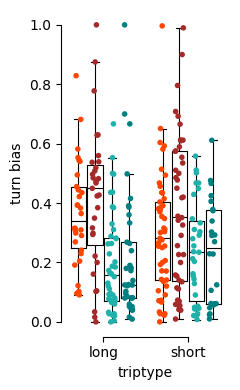

In [32]:
### plot colors
condcolors = {'0-125M_24hr': 'orangered', 
              '0-125M_40hr': 'brown',
              '0M_24hr': 'lightseagreen',
              '0M_40hr':'teal',
              '24hr': 'orangered', 
              '40hr': 'brown',}
trip_color = {
    'short': 'mediumpurple',
    'long': 'teal'
}

"""
STATS
"""
stats_df = {'groupA': [], 'groupB': [], 'test': [], 'p-value': []}
#print('Comparison 24 vs 40 hr ===')
for each in plotdf.triptype.unique():
    A, B = plotdf.loc[(plotdf.condition == '0-125M_24hr')&(plotdf.triptype == each)].abs_ifCW.values, plotdf.loc[(plotdf.condition == '0-125M_40hr')&(plotdf.triptype == each)].abs_ifCW.values
    _, pval = stats.ranksums(A,B)
    #print(f'({each}): pval={pval:3.3e}')
    stats_df['groupA'].append(f'{each}, 24-h')
    stats_df['groupB'].append(f'{each}, 40-h')
    stats_df['test'].append('scipy.stats.ranksums')
    stats_df['p-value'].append(pval)

#print('Comparison short vs long trip ===')
for each in plotdf.condition.unique():
    A, B = plotdf.loc[(plotdf.triptype == 'short')&(plotdf.condition == each)].abs_ifCW.values, plotdf.loc[(plotdf.triptype == 'long')&(plotdf.condition == each)].abs_ifCW.values
    _, pval = stats.ranksums(A,B)
    #print(f'({each}): pval={pval:3.3e}')
    stats_df['groupA'].append(f'{each}, short')
    stats_df['groupB'].append(f'{each}, long')
    stats_df['test'].append('scipy.stats.ranksums')
    stats_df['p-value'].append(pval)
stats_df = pd.DataFrame(stats_df)
display(stats_df)
### save source data and stats
#plotdf.to_csv(op.join(plotDir, 'sourcedata_fig3B.csv'), index=False)
#stats_df.to_csv(op.join(plotDir, 'stats_fig3B.csv'), index=False)

"""
PLOTTING
"""
fig, axs = plt.subplots(1,1,figsize=(2.5,4))
sns.stripplot(plotdf, x='triptype', y='abs_ifCW', hue='condition',palette=condcolors, ax=axs, 
              size=4, jitter=.2, dodge=True)
sns.boxplot(plotdf, x='triptype', y='abs_ifCW', hue='condition',palette=condcolors, dodge=True, 
            legend=False,fill=False, fliersize=0, width=.8, gap=0.1)
plt.setp(axs.lines, color='k',linewidth=0.8)
axs.set_ylabel('turn bias')

#axs.legend(False)
sns.despine(trim=True)
axs.get_legend().remove()
fig.tight_layout()
plt.show()
#plt.legend(frameon=False, loc=1)
#fig.savefig(op.join(plotDir, 'plot_fig3B.pdf'),dpi=300)

## This is a notebook for comparing run and turn statistics for different genotypes

This notebook also includes the detection of "very short" trips (less than 5 run/turn segments).

In [2]:
def makePerMoveSegmentDFNB(df,ethoStatsOfInterest):
    perMoveSegDf = pd.DataFrame()
    for genotype in df.genotype.unique():
        for condition in df.condition.unique():
            for flyid in df.flyid.unique():
                flyDf = df.query(f'flyid=="{flyid}" & condition=="{condition}" & genotype=="{genotype}"')
                if len(flyDf) == 0: continue
                    
                segL, segSt, segType = rle(flyDf.segment)
        
                prev_visit = 0
                cumdist_curr = 0
                cumRunTime_curr = 0                    
                cumtime_curr = 0
        
                moveSegDf_fly = {
                    'time': [],  
                    'seg_state': [],  
                    'etho_state': [],           
                    'after_which_visit': [],
                    'dist_since_visit': [], # total distance travelled during runs since last food spot visit
                    'time_since_visit': [], # time since last food spot visit
                    'cumRunTime_since_visit': [], # total run time since last food spot visit       
                    'seg_duration': [],
                    'seg_length': [], # total distance travelled by fly during this segment
                    'headturnangle': [], # net heading turn angle during movement segment (body angle at end - body angle at start)
                    'absheadturnangle': [], # absolute value of the turn angle
                    'ifCW': [], # whether the turn is in CW direction
                }
        
                for ii, ss in enumerate(segSt):
                    segtype_curr = segType[ii]
                    if segtype_curr == 1:
                        prev_visit = prev_visit + 1
                    if (segtype_curr == 1) or (segtype_curr == 2) or (segtype_curr == 4):
                        cumdist_curr = 0
                        cumRunTime_curr = 0
                        cumtime_curr = 0 # reset time since leaving food spot
        
                    se = min(ss+segL[ii], len(flyDf.body_x.values))
                    
                    ethoL, ethoSt, ethoType, ethoDuration = rle(flyDf.ethogram[ss:se], flyDf.dt[ss:se])
                    moveSegs = np.where(np.isin(ethoType,ethoStatsOfInterest))[0]
                    etho_StartTime = np.cumsum(np.insert(ethoDuration,0,0))
                    moveSegs_starttime = etho_StartTime[moveSegs]
                    moveSegs_ethoType = ethoType[moveSegs]
                        
                    if len(moveSegs) > 0: 
                        for moveIndx in range(len(moveSegs)):
                            moveSegDf_fly['seg_state'].append(segtype_curr)
                            moveSegDf_fly['etho_state'].append(moveSegs_ethoType[moveIndx])
                            moveSegDf_fly['after_which_visit'].append(prev_visit)
        
                            movedur = ethoDuration[moveSegs[moveIndx]]
                            moveSegDf_fly['seg_duration'].append(movedur)
                            
                            moveSegDf_fly['cumRunTime_since_visit'].append(cumRunTime_curr)
                            if segtype_curr != 1: cumRunTime_curr = cumRunTime_curr + movedur
                           
                            moveSegDf_fly['time_since_visit'].append(cumtime_curr + moveSegs_starttime[moveIndx])
                            
                            # segment length (distance)
                            startframe = max(ss + ethoSt[moveSegs[moveIndx]],0)
                            endframe = min(ss + ethoSt[moveSegs[moveIndx]] + ethoL[moveSegs[moveIndx]] + 1, len(flyDf.body_x.values)) # one frame after last frame
                            xpos_all = flyDf.body_x.values[startframe:endframe]
                            ypos_all = flyDf.body_y.values[startframe:endframe]
                            dist_all = np.sqrt((xpos_all[1:]-xpos_all[:-1])**2 + (ypos_all[1:]-ypos_all[:-1])**2)
                            totdist = np.nansum(dist_all)
                            moveSegDf_fly['seg_length'].append(totdist)
                            # store total running distance since last visit
                            moveSegDf_fly['dist_since_visit'].append(cumdist_curr)                        
                            if segtype_curr != 1:
                                cumdist_curr = cumdist_curr + totdist

                            moveSegDf_fly['time'].append(flyDf.time.values[startframe])

                            # starting displacement from center of spot
                            dispVec_fromcenter = np.array([xpos_all[0]-flyDf.food_x.values[0],ypos_all[0]-flyDf.food_y.values[0]])
        
                            # heading angle (vector from body to head of fly):
                            if endframe - startframe > 1:
                                headingAngle_all = flyDf.angle.values[startframe:endframe]
                                headturnangle_all = computeTurnAngBetween2angles(headingAngle_all[0],headingAngle_all[1:])
                                turnAngleDir_all = np.sign(headturnangle_all)
                                changedirFrameInds = np.where(turnAngleDir_all[0:-1] != turnAngleDir_all[1:])[0]
                                numchanges = len(changedirFrameInds)
                                if numchanges == 0:
                                    headturnangle_currseg = headturnangle_all[-1]
                                else:
                                    # investigate the first direction change
                                    changeFrameIndx = changedirFrameInds[-1] # frame right before change in direction
                                    if (np.abs(headturnangle_all[changeFrameIndx]) > np.pi/2) and (np.abs(headturnangle_all[changeFrameIndx+1]) > np.pi/2):
                                        headturnangle_last = headturnangle_all[-1]
                                        headturnangle_currseg = -np.sign(headturnangle_last)*2*np.pi + headturnangle_last
                                    else:
                                        headturnangle_currseg = headturnangle_all[-1]
                                moveSegDf_fly['headturnangle'].append(headturnangle_currseg)
                                moveSegDf_fly['absheadturnangle'].append(np.abs(headturnangle_currseg))
                                ifCW_currseg = headturnangle_currseg<0
                                moveSegDf_fly['ifCW'].append(ifCW_currseg)
                                
                            else:
                                moveSegDf_fly['headturnangle'].append(0)
                                moveSegDf_fly['absheadturnangle'].append(0)
                                moveSegDf_fly['ifCW'].append(np.nan)
        
                    if (segtype_curr == 4) or (segtype_curr == 5) or (segtype_curr == 0):
                        cumtime_curr = cumtime_curr + etho_StartTime[-1]
                        
                moveSegDf_fly = pd.DataFrame(moveSegDf_fly)
                moveSegDf_fly['genotype'] = genotype
                moveSegDf_fly = addExpInfo(moveSegDf_fly, flyid, condition, 'na', 'na', 'na')
                perMoveSegDf = pd.concat([perMoveSegDf, moveSegDf_fly], sort=False)

                # Augment per-segment dataframe with other properties
                # radius of curvature of segments
                perMoveSegDf['effArcRadius'] = perMoveSegDf['seg_length']/perMoveSegDf['absheadturnangle']
                perMoveSegDf['time_min'] = perMoveSegDf.time.values/60
    return perMoveSegDf


from scipy import stats

# This is a function for automatically getting the names of the parameters of a specified distribution
def list_parameters(distribution):
    """List parameters for scipy.stats.distribution.
    # Arguments
        distribution: a string or scipy.stats distribution object.
    # Returns
        A list of distribution parameter strings.
    """
    if isinstance(distribution, str):
        distribution = getattr(stats, distribution)
    if distribution.shapes:
        parameters = [name.strip() for name in distribution.shapes.split(',')]
    else:
        parameters = []
    if distribution.name in stats._discrete_distns._distn_names:
        parameters += ['loc']
    elif distribution.name in stats._continuous_distns._distn_names:
        parameters += ['loc', 'scale']
    else:
        sys.exit("Distribution name not found in discrete or continuous lists.")
    return parameters

# function for plotting distribution of a quantity of interest across all flies 
# either across conditions or over all conditions
# In this v2, we allow fitting to arbitrary specified distribution, and specify the fitted distribution over the data
def getModelDistributionParams(df, qOI, criteria, fitdist, iflog = False, ifcdf = False):

    # convert fitdist to a distribution object if relevant
    if isinstance(fitdist, str): fitdist = getattr(stats, fitdist)

    # extract parameter names of fitted distribution if relevant
    parameterNames = list_parameters(fitdist)
    numparams = len(parameterNames)

    # include other relevant selection criteria
    for key in criteria.keys():
        minvalue = criteria[key]['min']
        maxvalue = criteria[key]['max']
        df = df.loc[(df[key] >= minvalue) & (df[key] <= maxvalue)]
    
    qoIvec = df[qOI].values
    qoIvec = qoIvec[~np.isnan(qoIvec)]
    if iflog == False: datavec = qoIvec
    elif iflog == True: datavec = np.log10(np.abs(qoIvec[qoIvec!=0]))

    datavec = datavec[~np.isnan(datavec)]
    datavec = datavec[~np.isinf(datavec)]

    try:
        fittedparams = fitdist.fit(datavec)
        xscan = np.linspace(np.min(datavec),np.max(datavec),100) 
        if ifcdf == False: best_fit_line = fitdist.pdf(xscan, *fittedparams)
        else: best_fit_line = fitdist.cdf(xscan, *fittedparams)
    except:
        fittedparams = None
        best_fit_line = None

    return datavec, fittedparams, best_fit_line

def plotModelDistributionParams(ax, datavec, fittedparams, best_fit_line, condcol='b',ifcdf = False, iflog = False, ifpdf = True):
    if ifcdf == False: ax.hist(datavec,numbins, density = ifpdf,color = condcol, alpha=0.5)   
    else: ax.hist(datavec,numbins, density = True, histtype = "step", cumulative = True, color = condcol, alpha=0.4)   

    if fittedparams != None:
        xscan = np.linspace(np.min(datavec),np.max(datavec),100) 
        ax.plot(xscan,best_fit_line,linewidth = 1, color = condcol)
        ymax = np.max(best_fit_line)
        
    if iflog == False: qName = qOI
    else: qName = 'log10(' + qOI + ')'
    ax.set_xlabel(qName)
    if ifcdf == False: ax.set_ylabel("P")
    else: ax.set_ylabel("C")

    return ax

In [3]:
rootDir = './dat/'
groupName = 'CantonSMH'
analyse_per_trip = True
groups = {
    'CantonSMH': ['JR_CantonSMH_single_dark_5ul_perframe_0-125M_24hr',
        'JR_CantonSMH_single_dark_5ul_perframe_0-125M_40hr',
        'JR_CantonSMH_single_dark_5ul_perframe_0M_24hr',
        'JR_CantonSMH_single_dark_5ul_perframe_0M_40hr'],
}
files = groups[groupName]
plotDir = getcwd() + sep + 'plt'+ sep + groupName
try:makedirs(plotDir)
except:pass

trip_color_incl = { ### mutually inclusive (i.e., short = very short + short; all = long + short + very short)
    'very short': 'purple',
    'short': 'mediumpurple',
    'all': 'skyblue',
}

In [4]:
files = groups[groupName]
print(*files, sep='\n')
print(plotDir)

JR_CantonSMH_single_dark_5ul_perframe_0-125M_24hr
JR_CantonSMH_single_dark_5ul_perframe_0-125M_40hr
JR_CantonSMH_single_dark_5ul_perframe_0M_24hr
JR_CantonSMH_single_dark_5ul_perframe_0M_40hr
/Users/hannahhaberkern/Documents/GitHub/foraging-analysis/plt/CantonSMH


## Load data

In [5]:
with np.errstate(divide='ignore') and pd.option_context('mode.chained_assignment', None):
    datDf, metadata = getDataPerGroup(rootDir, files) 
conditions = list(np.unique(datDf.condition.values))
genotypes = list(np.unique(datDf.genotype.values))
flyids = list(np.unique(datDf.flyid.values))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

/Users/hannahhaberkern/Documents/GitHub/foraging-analysis/src/makedataframe.py:95: RuntimeWarning: invalid value encountered in divide
  datDf['cff'] = np.divide(datDf.fed.values, datDf.time.values)


In [6]:
if analyse_per_trip:
    #load trip dataframe
    per_trip_df = pd.read_csv(plotDir+sep+f'tripDf_{groupName}.csv')
    per_trip_df.head()

## Create per-move segment dataframe

In [7]:
slct_ethoStates = [1,2] #{0: 'border', 1: 'turn', 2: 'run', 3: 'feeding', 4: 'other'}
slct_cond = list(datDf.condition.unique())
datDf_filt = datDf.query(f'ethogram != {4} & condition in {slct_cond}')
# create per-move segment dataframe consisting only of runs and turns
perMoveSegDF = makePerMoveSegmentDFNB(datDf_filt,ethoStatsOfInterest=slct_ethoStates)

In [8]:
perMoveSegDF.query('genotype == "CantonSMH" & fly=="fly05"')

,time,seg_state,etho_state,after_which_visit,dist_since_visit,time_since_visit,cumRunTime_since_visit,seg_duration,seg_length,headturnangle,absheadturnangle,ifCW,genotype,fly,condition,place,light,food,effArcRadius,time_min
0,0.000000,5,1,0,0.000000,0.000000,0.000000,0.083388,1.591510,-0.378823,0.378823,True,CantonSMH,fly05,0-125M_24hr,na,na,na,4.201196,0.000000
1,0.083388,5,2,0,1.591510,0.083388,0.083388,0.125081,2.375684,-0.112274,0.112274,True,CantonSMH,fly05,0-125M_24hr,na,na,na,21.159697,0.001390
2,0.208469,5,1,0,3.967194,0.208469,0.208469,0.208469,3.704740,-0.649831,0.649831,True,CantonSMH,fly05,0-125M_24hr,na,na,na,5.701082,0.003474
3,0.416938,5,2,0,7.671933,0.416938,0.416938,0.083387,1.573425,-0.053376,0.053376,True,CantonSMH,fly05,0-125M_24hr,na,na,na,29.478143,0.006949
4,0.500325,5,1,0,9.245358,0.500325,0.500325,0.542020,6.432343,0.584858,0.584858,False,CantonSMH,fly05,0-125M_24hr,na,na,na,10.998127,0.008339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,2668.777780,4,2,8,117.118734,9.422798,9.422798,0.750489,5.650358,-0.458109,0.458109,True,CantonSMH,fly05,0M_40hr,na,na,na,12.334083,44.479630
2789,2680.035103,4,1,8,122.769092,10.173287,10.173287,0.125081,1.136615,-0.112218,0.112218,True,CantonSMH,fly05,0M_40hr,na,na,na,10.128636,44.667252
2790,2680.160185,4,2,8,123.905708,10.298368,10.298368,0.750489,6.730379,-0.458964,0.458964,True,CantonSMH,fly05,0M_40hr,na,na,na,14.664285,44.669336
2791,2680.910673,4,1,8,130.636087,11.048857,11.048857,0.125081,0.945940,-0.168539,0.168539,True,CantonSMH,fly05,0M_40hr,na,na,na,5.612590,44.681845


### Merge "per-move segment" and "per-trip" dataframes (restricted to "post food phase)

In [11]:
per_move_postfood_df = pd.DataFrame()
# loop over genotypes, conditions, flies and add trip information (this could be done more elegantly)
for genotype in genotypes:
    for condition in conditions:
        for flyid in perMoveSegDF.fly.unique():

            # generate a copy of the per-move segment dataframe that only contains data after the first food visit
            flyDf_move = perMoveSegDF.query(f'fly=="{flyid}" & condition=="{condition}" & genotype=="{genotype}" & after_which_visit >0').reset_index(drop=True)
            if len(flyDf_move) == 0: continue
            
            flyDf_move['flyid'] = flyDf_move.fly.values

            if analyse_per_trip:
                flyDf_trip = per_trip_df.query(f'flyid=="{flyid}" & condition=="{condition}" & genotype=="{genotype}"').reset_index(drop=True)
                flyDf_trip['after_which_visit'] = flyDf_trip.trip_index.values.astype('int') + 1
                df = pd.merge(flyDf_move, flyDf_trip, on=['genotype','condition', 'flyid','after_which_visit'], how='outer')
            else:
                df = flyDf_move
            per_move_postfood_df = pd.concat([per_move_postfood_df, df], sort=False)

## Generate distribution plots
To generate the plots for the "before food" and "after food" condition, change the 'visitTH' variable to ==0 -(-> before finding food spot) or >=1 (--> after finding food)

In [16]:
# extract data of interest
numbins = 30
visitTH = '>=1' #  This is an upper bound: ==0 --> before finding food spot, >=1 --> after finding food.
if visitTH == '==0': postfix = 'beforefood'
else: postfix = 'afterfood'
criteria = {}
print(genotypes)
conditions = list(datDf.condition.unique())
conditions = list(set(conditions))
conditions.sort()
print(conditions)
print(postfix)

['CantonSMH']
['0-125M_24hr', '0-125M_40hr', '0M_24hr', '0M_40hr']
afterfood


<a id='fig-3c'></a>
## Fig. 3C - Probability distribution of $log_{10}$ run lengths for 24-h-starved, and 40-h-starved wild type flies

,a,loc,scale,condition,genotype
0,-2.718279,1.014646,0.751341,0-125M_24hr,CantonSMH
1,-1.816468,0.735049,0.689546,0-125M_40hr,CantonSMH


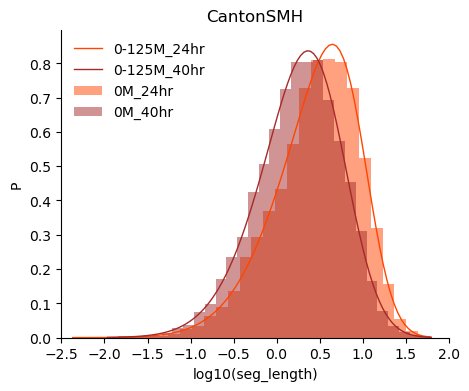

In [39]:
# extract data of interest
etho_state = [2] # 2: runs
qOI = 'seg_length'
iflogq = True
distOI = 'skewnorm'

dffitRunLenAll = pd.DataFrame()
fig, axs = plt.subplots(1,1,figsize=(5,4))

for g, genotype in enumerate(genotypes):
    fittedparamsall = np.nan*np.ones((3,len(conditions)))
    for c, cond in enumerate(conditions[:2]):
        ax = axs
        plotcol = cond_color[cond]
        querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & condition == "{cond}" & genotype == "{genotype}"'
        querystring = querystring + f' & after_which_visit {visitTH}'
        perMoveSegDF_filt = perMoveSegDF.query(querystring)
        if len(perMoveSegDF_filt) == 0: 
            continue
        datavec, fittedparams, best_fit_line = getModelDistributionParams(perMoveSegDF_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
        fittedparamsall[:,c] = fittedparams
        ax = plotModelDistributionParams(ax, datavec, fittedparams, best_fit_line, condcol=plotcol,iflog = iflogq)
    
    dffitRunLen = pd.DataFrame(data=fittedparamsall.T, columns = ['a','loc','scale'])
    dffitRunLen['condition'] = conditions
    dffitRunLen['genotype'] = genotype
    dffitRunLenAll = pd.concat([dffitRunLenAll,dffitRunLen])
dffitRunLenAll = dffitRunLenAll.reset_index(drop=True).dropna()

axs.legend(conditions, frameon=False)
axs.set_xlim(-2.5,2)
myAxisTheme(axs)
ax.set_title(genotypes[0])
    
fig.savefig(plotDir+sep+'runLengthDistribution_'+postfix+'_Fig3C.pdf')

dffitRunLenAll.reset_index(drop=True)
dffitRunLenAll.to_csv(plotDir+sep+'runLengthDistribution_'+postfix+'.csv', index=False)  

dffitRunLenAll

<a id='fig-3f'></a>
## Fig. 3F - Probability distribution of run lengths for short and long trips in 24-h-starved wild type flies

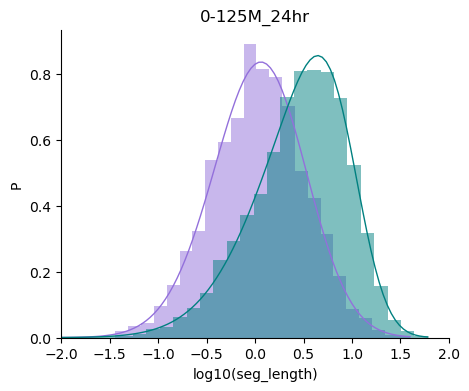

In [40]:
if postfix == 'afterfood' and analyse_per_trip:  #only makes sense after food
    triptypes = trip_color.keys() ### ["very short","short","all"]
    fig, ax = plt.subplots(len(genotypes),1,figsize=(5,4*len(genotypes)))
    dffitRunLenTrips = pd.DataFrame()
    for g, genotype in enumerate(genotypes):
        cond=conditions[0]
        fittedparamsall = np.nan*np.ones((3,len(triptypes)))
        for tt, triptype in enumerate(triptypes):
            plotcol = trip_color[triptype]
            querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & condition == "{cond}" & genotype == "{genotype}"'
            querystring = querystring + f' & after_which_visit {visitTH}'
            if triptype == 'very short':
                querystring = " & ".join([querystring, f'triptype_vs == "{triptype}"'])
            elif triptype == 'short':
                querystring = " & ".join([querystring, f'triptype == "{triptype}"'])
            per_move_postfood_df_filt = per_move_postfood_df.query(querystring)
            if len(per_move_postfood_df_filt) == 0: 
                continue
            datavec, fittedparams, best_fit_line = getModelDistributionParams(per_move_postfood_df_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
            fittedparamsall[:,tt] = fittedparams
            a = plotModelDistributionParams(ax, datavec, fittedparams, best_fit_line, condcol=plotcol,iflog = iflogq)

        a.set_xlim(-2,2)
        myAxisTheme(a)
        if g==0: a.set_title(cond)

        dffitRunLen = pd.DataFrame(data=fittedparamsall.T, columns = ['a','loc','scale'])
        dffitRunLen['trip'] = triptypes
        dffitRunLen['condition'] = cond
        dffitRunLen['genotype'] = genotype
        dffitRunLenTrips = pd.concat([dffitRunLenTrips,dffitRunLen])
    
    fig.savefig(plotDir+sep+'runLengthDistribution_triptype_'+postfix+'_Fig3F.pdf')

<a id='fig-3D'></a>
## Fig. 3D - Probability distribution of absolute turn sizes for 24-h-starved, and 40-h-starved wild type flies

,s,loc,scale,condition,genotype
0,0.791744,-0.047435,0.416081,0-125M_24hr,CantonSMH
1,0.897445,-0.031354,0.386104,0-125M_40hr,CantonSMH


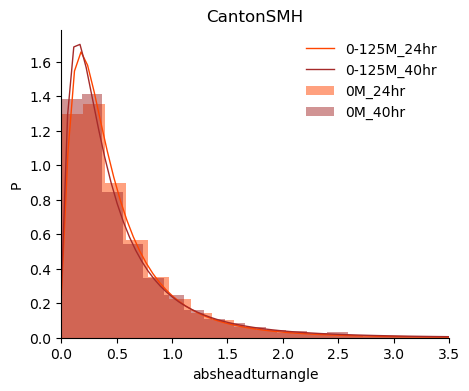

In [42]:
# extract data of interest
etho_state = [1] # 1: turns
qOI = 'absheadturnangle'
iflogq = False
distOI = 'lognorm'
xlims = (0,3.5) #0,3

dffitTurnAngAll = pd.DataFrame()
fig, axs = plt.subplots(1,1,figsize=(5,4))

for g, genotype in enumerate(genotypes):
    fittedparamsall = np.nan*np.ones((3,len(conditions)))
    for c, cond in enumerate(conditions[:2]):
        ax = axs
        plotcol = cond_color[cond]
        
        querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & condition == "{cond}" & genotype == "{genotype}"'
        querystring = querystring + f' & after_which_visit {visitTH}'
        
        perMoveSegDF_filt = perMoveSegDF.query(querystring)
        if len(perMoveSegDF_filt) == 0: 
            continue
        datavec, fittedparams, best_fit_line = getModelDistributionParams(perMoveSegDF_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
        fittedparamsall[:,c] = fittedparams
        ax = plotModelDistributionParams(ax, datavec, fittedparams, best_fit_line, condcol=plotcol,iflog = iflogq)

    dffitTurnAng = pd.DataFrame(data=fittedparamsall.T, columns = ['s','loc','scale'])
    dffitTurnAng['condition'] = conditions
    dffitTurnAng['genotype'] = genotype
    dffitTurnAngAll = pd.concat([dffitTurnAngAll,dffitTurnAng])
dffitTurnAngAll = dffitTurnAngAll.reset_index(drop=True).dropna()

axs.legend(conditions, frameon=False)
axs.set_xlim(xlims)
myAxisTheme(axs)
ax.set_title(genotypes[0])
fig.savefig(plotDir+sep+'turnAngleDistribution_'+postfix+'_Fig3D.pdf')

dffitTurnAngAll.to_csv(plotDir+sep+'turnAngleDistribution_'+postfix+'.csv', index=False)  
dffitTurnAngAll

<a id='fig-3g'></a>
## Fig. 3G - Probability distribution of absolute turn sizes for short and long trips in 24-h-starved wild type flies

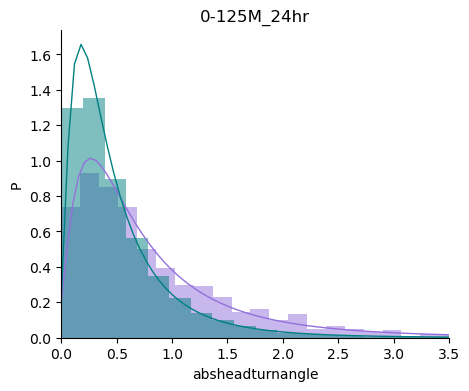

In [45]:
if postfix == 'afterfood' and analyse_per_trip:  #only makes sense after food
    fig, axs = plt.subplots(len(genotypes),1,figsize=(5*1,4*len(genotypes)))
    dffitTurnAngTrips = pd.DataFrame()
    for g, genotype in enumerate(genotypes):
        cond =conditions[0]
        ax = axs
        fittedparamsall = np.nan*np.ones((3,len(triptypes)))
        for tt, triptype in enumerate(triptypes):
            plotcol = trip_color[triptype]
            querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & condition == "{cond}" & genotype == "{genotype}"'
            querystring = querystring + f' & after_which_visit {visitTH}'
            
            if triptype == 'very short':
                querystring = " & ".join([querystring, f'triptype_vs == "{triptype}"'])
            elif triptype == 'short':
                querystring = " & ".join([querystring, f'triptype == "{triptype}"'])
            
            per_move_postfood_df_filt = per_move_postfood_df.query(querystring)
            if len(per_move_postfood_df_filt) == 0: 
                ax.set_axis_off()
                continue
            datavec, fittedparams, best_fit_line = getModelDistributionParams(per_move_postfood_df_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
            fittedparamsall[:,tt] = fittedparams
            a = plotModelDistributionParams(ax, datavec, fittedparams, best_fit_line, condcol=plotcol,iflog = iflogq)
        a.set_xlim(xlims)
        myAxisTheme(a)
        if g==0: a.set_title(cond)

        dffitTurnAng = pd.DataFrame(data=fittedparamsall.T, columns = ['s','loc','scale'])
        dffitTurnAng['trip'] = triptypes
        dffitTurnAng['condition'] = cond
        dffitTurnAng['genotype'] = genotype
        dffitTurnAngTrips = pd.concat([dffitTurnAngTrips,dffitTurnAng])
    
    fig.savefig(plotDir+sep+'turnAngleDistribution_triptype_'+postfix+'_Fig3G.pdf')

<a id='fig-3e'></a>
## Fig. 3E - Probability distribution of turn radii for 24-h-starved, and 40-h-starved wild type flies

,c,loc,scale,condition,genotype
0,1.068116,0.674176,0.232721,0-125M_24hr,CantonSMH
1,2.456026,0.214205,0.307154,0-125M_40hr,CantonSMH
2,NaN,NaN,NaN,0M_24hr,CantonSMH
3,NaN,NaN,NaN,0M_40hr,CantonSMH


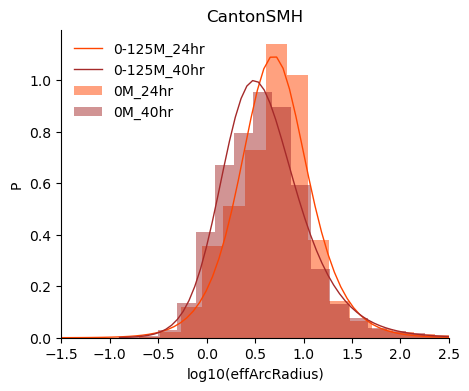

In [51]:
# extract data of interest
etho_state = [1] # 1: turns
qOI = 'effArcRadius'
iflogq = True
distOI = 'genlogistic'
xlims = (-1.5, 2.5)

dffitTurnRadAll = pd.DataFrame()

fig, axs = plt.subplots(1,1,figsize=(5,4))

for g, genotype in enumerate(genotypes):
    fittedparamsall = np.nan*np.ones((3,len(conditions)))
    for c, cond in enumerate(conditions[:2]):
        ax = axs
        plotcol = cond_color[cond]
        querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & condition == "{cond}" & genotype == "{genotype}"'
        
        perMoveSegDF_filt = perMoveSegDF.query(querystring)
        if len(perMoveSegDF_filt) == 0: continue
        datavec, fittedparams, best_fit_line = getModelDistributionParams(perMoveSegDF_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
        fittedparamsall[:,c] = fittedparams
        ax = plotModelDistributionParams(ax, datavec, fittedparams, best_fit_line, condcol=plotcol,iflog = iflogq)

    dffitTurnRad = pd.DataFrame(data=fittedparamsall.T, columns = ['c','loc','scale'])
    dffitTurnRad['condition'] = conditions
    dffitTurnRad['genotype'] = genotype
    dffitTurnRadAll = pd.concat([dffitTurnRadAll,dffitTurnRad])
dffitTurnRadAll = dffitTurnRadAll.reset_index(drop=True)

axs.legend(conditions, frameon=False)
axs.set_xlim(xlims)
myAxisTheme(axs)
ax.set_title(genotypes[0])
fig.savefig(plotDir+sep+'turnRadiusDistribution_'+postfix+'_Fig3E.pdf')

dffitTurnRadAll.to_csv(plotDir+sep+'turnRadiusDistribution_'+postfix+'.csv', index=False)  
dffitTurnRadAll

<a id='fig-3h'></a>
## Fig. 3H - Probability distribution of turn radii for short and long trips in 24-h-starved wild type flies

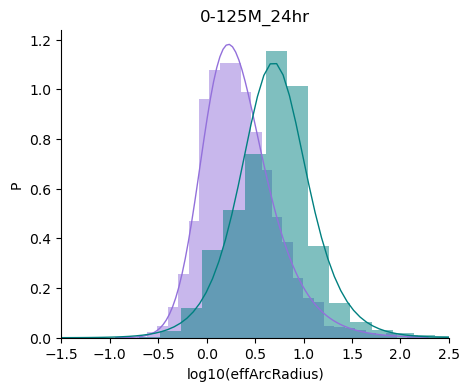

In [53]:
if postfix == 'afterfood' and analyse_per_trip:  #only makes sense after food
    fig, axs = plt.subplots(len(genotypes),1,figsize=(5,4*len(genotypes)))
    dffitTurnRadTrips = pd.DataFrame()
    for g, genotype in enumerate(genotypes):
        cond = conditions[0]
        ax = axs
        fittedparamsall = np.nan*np.ones((3,len(triptypes)))
        for tt, triptype in enumerate(triptypes):
            plotcol = trip_color[triptype]
            querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & condition == "{cond}" & genotype == "{genotype}"'
            querystring = querystring + f' & after_which_visit {visitTH}'
            if triptype == 'very short':
                querystring = " & ".join([querystring, f'triptype_vs == "{triptype}"'])
            elif triptype == 'short':
                querystring = " & ".join([querystring, f'triptype == "{triptype}"'])
            
            per_move_postfood_df_filt = per_move_postfood_df.query(querystring)
            if len(per_move_postfood_df_filt) == 0: 
                ax.set_axis_off()
                continue
            datavec, fittedparams, best_fit_line = getModelDistributionParams(per_move_postfood_df_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
            fittedparamsall[:,tt] = fittedparams
            a = plotModelDistributionParams(ax, datavec, fittedparams, best_fit_line, condcol=plotcol,iflog = iflogq)
        a.set_xlim(xlims)
        myAxisTheme(a)
        if g==0: a.set_title(cond)
        
        dffitTurnRad = pd.DataFrame(data=fittedparamsall.T, columns = ['c','loc','scale'])
        dffitTurnRad['trip'] = triptypes
        dffitTurnRad['condition'] = cond
        dffitTurnRad['genotype'] = genotype
        dffitTurnRadTrips = pd.concat([dffitTurnRadTrips,dffitTurnRad])
    
    fig.savefig(plotDir+sep+'turnRadiusDistribution_triptype_'+postfix+'_Fig3H.pdf')

<a id='fig-s3g'></a>
## Fig. S3G - Shape, location and scale parameters (function fit) of run length distribution before and after first food visit

In [141]:
# extract data of interest
etho_state = [2] # 2: runs
qOI = 'seg_length'
iflogq = True
distOI = 'skewnorm'

dffitRunLenAll = pd.DataFrame()
for visitTH in ['==0','>=1']: #  This is an upper bound: ==0 --> before finding food spot, >=1 --> after finding food.
    
    if visitTH == '==0': postfix = 'beforefood'
    else: postfix = 'afterfood'
    
    fittedparamsall = np.nan*np.ones((3,len(conditions)))
    for c, cond in enumerate(conditions):
        querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & condition == "{cond}" & genotype == "{genotype}"'
        querystring = querystring + f' & after_which_visit {visitTH}'
        perMoveSegDF_filt = perMoveSegDF.query(querystring)
        if len(perMoveSegDF_filt) == 0: continue
        datavec, fittedparams, best_fit_line = getModelDistributionParams(perMoveSegDF_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
        fittedparamsall[:,c] = fittedparams
    dffitRunLen = pd.DataFrame(data=fittedparamsall.T, columns = ['a','loc','scale'])
    dffitRunLen['condition'] = conditions
    dffitRunLen['genotype'] = genotype
    dffitRunLen['food'] = postfix[:-4]
    dffitRunLen = dffitRunLen.reset_index(drop=True).dropna()
    
    #dffitRunLen.to_csv(plotDir+sep+'runLengthDistribution_'+postfix+'.csv', index=False)  

    dffitRunLenAll = pd.concat([dffitRunLenAll,dffitRunLen])
    
    print(postfix)
    print(dffitRunLen)

beforefood
          a       loc     scale    condition   genotype    food
0 -2.628717  0.977031  0.746541  0-125M_24hr  CantonSMH  before
1 -2.394220  0.873348  0.738654  0-125M_40hr  CantonSMH  before
2 -3.136324  1.086236  0.759539      0M_24hr  CantonSMH  before
3 -2.139820  0.923014  0.788341      0M_40hr  CantonSMH  before
afterfood
          a       loc     scale    condition   genotype   food
0 -2.718279  1.014646  0.751341  0-125M_24hr  CantonSMH  after
1 -1.816468  0.735049  0.689546  0-125M_40hr  CantonSMH  after
2 -2.681397  1.048716  0.760460      0M_24hr  CantonSMH  after
3 -2.057968  0.929428  0.735361      0M_40hr  CantonSMH  after


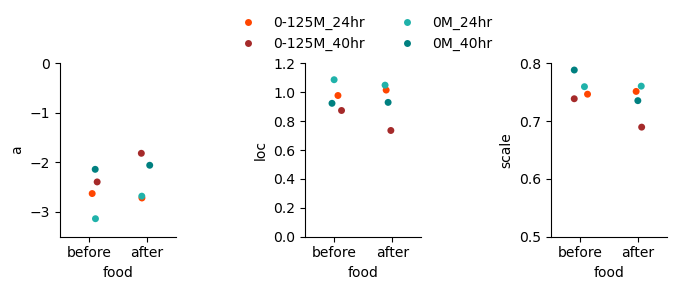

In [142]:
fig, axs = plt.subplots(1,3, figsize=(7,3))

vlims = [[-3.5,0],[0,1.2],[.5,.8]]
for p, param in enumerate(['a','loc','scale']):
    sns.stripplot(data=dffitRunLenAll, x='food', y=param, hue='condition', palette=cond_color, ax=axs[p], jitter=0.15)
    sns.despine()
    if p!=1: axs[p].legend([],[], frameon=False)
    else: sns.move_legend(axs[p], "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
    axs[p].set_ylim(vlims[p])
fig.tight_layout()
fig.savefig(plotDir+sep+'runLengthDistributionFitParams_'+postfix+'_FigS3G.pdf')

<a id='fig-s3h'></a>
## Fig. S3H - Shape, location and scale parameters obtained from fits to the run length distribution between short and long trips (after first food visit)

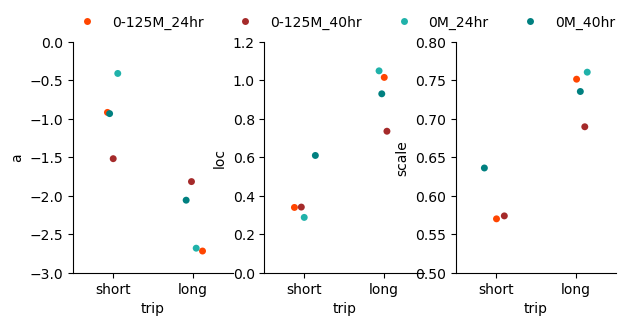

In [143]:
triptypes = trip_color.keys()
dffitRunLenTrips = pd.DataFrame()
for c, cond in enumerate(conditions):
    fittedparamsall = np.nan*np.ones((3,len(triptypes)))
    for tt, triptype in enumerate(triptypes):
        plotcol = trip_color[triptype]
        querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & condition == "{cond}" & genotype == "{genotype}"'
        querystring = querystring + f' & after_which_visit {visitTH}'
        if triptype == 'very short':
            querystring = " & ".join([querystring, f'triptype_vs == "{triptype}"'])
        elif triptype == 'short':
            querystring = " & ".join([querystring, f'triptype == "{triptype}"'])
        per_move_postfood_df_filt = per_move_postfood_df.query(querystring)
        if len(per_move_postfood_df_filt) == 0: 
            continue
        datavec, fittedparams, best_fit_line = getModelDistributionParams(per_move_postfood_df_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
        fittedparamsall[:,tt] = fittedparams

    dffitRunLen = pd.DataFrame(data=fittedparamsall.T, columns = ['a','loc','scale'])
    dffitRunLen['trip'] = triptypes
    dffitRunLen['condition'] = cond
    dffitRunLen['genotype'] = genotype
    dffitRunLenTrips = pd.concat([dffitRunLenTrips,dffitRunLen])
dffitRunLenTrips = dffitRunLenTrips.reset_index(drop=True).dropna()
dffitRunLenTrips.to_csv(plotDir+sep+'runLengthDistribution_byTrip_'+postfix+'.csv', index=False)  

tps = dffitRunLenTrips.trip.values
conds = dffitRunLenTrips.condition.values
gens = dffitRunLenTrips.genotype.values
dffitRunLenTrips['gen-trip'] = [f'{tps[t]}\n{gens[t]}' for t in range(len(tps))]    

fig, axs = plt.subplots(1,3, figsize=(7,3))
vlims = [[-3,0],[0,1.2],[0.5,0.8]]
for p, param in enumerate(['a','loc','scale']):
    sns.stripplot(data=dffitRunLenTrips, x='trip', y=param, hue='condition', palette=cond_color, ax=axs[p], jitter=0.15)
    axs[p].set_ylim(vlims[p])
    sns.despine()
    if p!=1: axs[p].legend([],[], frameon=False)
    else:  sns.move_legend(axs[p], "lower center",bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
#fig.tight_layout()
fig.savefig(plotDir+sep+'runLengthDistributionFitParams_triptype_'+postfix+'_FigS3H_.pdf')

<a id='fig-s3i'></a>
## Fig. S3I - Same as S3G, H, but for the distribution of absolute turn angles

In [150]:
# extract data of interest
etho_state = [1] # 1: turns
qOI = 'absheadturnangle'
iflogq = False
distOI = 'lognorm'
xlims = (0,3.5) #0,3

dffitTurnAngAll = pd.DataFrame()
for visitTH in ['==0','>=1']: #  This is an upper bound: ==0 --> before finding food spot, >=1 --> after finding food.
    
    if visitTH == '==0': postfix = 'beforefood'
    else: postfix = 'afterfood'
    
    fittedparamsall = np.nan*np.ones((3,len(conditions)))
    for c, cond in enumerate(conditions):
        querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & condition == "{cond}" & genotype == "{genotype}"'
        querystring = querystring + f' & after_which_visit {visitTH}'
        perMoveSegDF_filt = perMoveSegDF.query(querystring)
        if len(perMoveSegDF_filt) == 0: continue
        datavec, fittedparams, best_fit_line = getModelDistributionParams(perMoveSegDF_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
        fittedparamsall[:,c] = fittedparams
    dffitTurnAng = pd.DataFrame(data=fittedparamsall.T, columns = ['s','loc','scale'])
    dffitTurnAng['condition'] = conditions
    dffitTurnAng['genotype'] = genotype
    dffitTurnAng['food'] = postfix[:-4]
    dffitTurnAng = dffitTurnAng.reset_index(drop=True).dropna()
    
    dffitTurnAng.to_csv(plotDir+sep+'turnAngleDistribution_'+postfix+'.csv', index=False)  

    dffitTurnAngAll = pd.concat([dffitTurnAngAll,dffitTurnAng])
    
    print(postfix)
    print(dffitTurnAng)

/Users/hannahhaberkern/miniconda3/envs/foraging/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/Users/hannahhaberkern/miniconda3/envs/foraging/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/Users/hannahhaberkern/miniconda3/envs/foraging/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


beforefood
          s       loc     scale    condition   genotype    food
0  0.776713 -0.042273  0.333216  0-125M_24hr  CantonSMH  before
1  0.763790 -0.048788  0.354810  0-125M_40hr  CantonSMH  before
2  0.788044 -0.037369  0.336046      0M_24hr  CantonSMH  before
3  0.873721 -0.030492  0.323045      0M_40hr  CantonSMH  before
afterfood
          s       loc     scale    condition   genotype   food
0  0.791744 -0.047435  0.416081  0-125M_24hr  CantonSMH  after
1  0.897445 -0.031354  0.386104  0-125M_40hr  CantonSMH  after
2  0.820887 -0.046901  0.373218      0M_24hr  CantonSMH  after
3  0.740694 -0.055624  0.401626      0M_40hr  CantonSMH  after


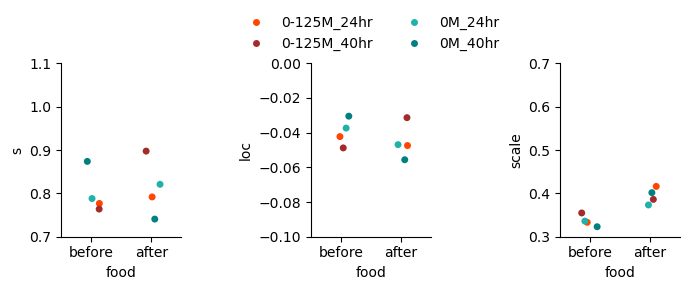

In [151]:
fig, axs = plt.subplots(1,3, figsize=(7,3))

vlims = [[.7,1.1],[-.1,0],[.3,.7]]
for p, param in enumerate(['s','loc','scale']):
    sns.stripplot(data=dffitTurnAngAll, x='food', y=param, hue='condition', palette=cond_color, ax=axs[p], jitter=0.15)
    sns.despine()
    if p!=1: axs[p].legend([],[], frameon=False)
    else: sns.move_legend(axs[p], "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
    axs[p].set_ylim(vlims[p])
fig.tight_layout()
fig.savefig(plotDir+sep+'turnAngleDistributionFitParams_'+postfix+'_FigS3I.pdf')

<a id='fig-s3j'></a>
## Fig. S3J - Same as S3G, H, but for the distribution of absolute turn angles

/Users/hannahhaberkern/miniconda3/envs/foraging/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


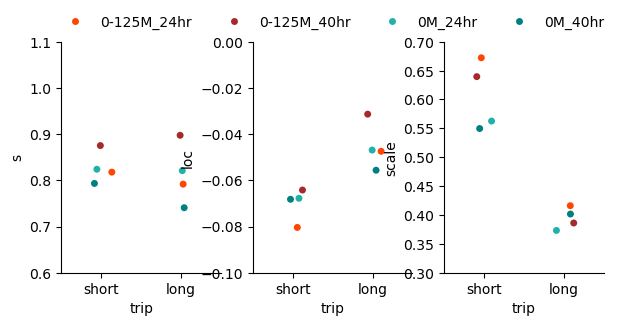

In [152]:
triptypes = trip_color.keys()
dffitTurnAngTrips = pd.DataFrame()
for c, cond in enumerate(conditions):
    fittedparamsall = np.nan*np.ones((3,len(triptypes)))
    for tt, triptype in enumerate(triptypes):
        plotcol = trip_color[triptype]
        querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & condition == "{cond}" & genotype == "{genotype}"'
        querystring = querystring + f' & after_which_visit {visitTH}'
        if triptype == 'very short':
            querystring = " & ".join([querystring, f'triptype_vs == "{triptype}"'])
        elif triptype == 'short':
            querystring = " & ".join([querystring, f'triptype == "{triptype}"'])
        per_move_postfood_df_filt = per_move_postfood_df.query(querystring)
        if len(per_move_postfood_df_filt) == 0: 
            continue
        datavec, fittedparams, best_fit_line = getModelDistributionParams(per_move_postfood_df_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
        fittedparamsall[:,tt] = fittedparams

    dffitTurnAng = pd.DataFrame(data=fittedparamsall.T, columns = ['s','loc','scale'])
    dffitTurnAng['trip'] = triptypes
    dffitTurnAng['condition'] = cond
    dffitTurnAng['genotype'] = genotype
    dffitTurnAngTrips = pd.concat([dffitTurnAngTrips,dffitTurnAng])
dffitTurnAngTrips = dffitTurnAngTrips.reset_index(drop=True).dropna()
dffitTurnAngTrips.to_csv(plotDir+sep+'turnAngleDistribution_byTrip_'+postfix+'.csv', index=False)  

tps = dffitTurnAngTrips.trip.values
conds = dffitTurnAngTrips.condition.values
gens = dffitTurnAngTrips.genotype.values
dffitTurnAngTrips['gen-trip'] = [f'{tps[t]}\n{gens[t]}' for t in range(len(tps))]    

fig, axs = plt.subplots(1,3, figsize=(7,3))
vlims = [[.6,1.1],[-.1,0],[.3,.7]]
for p, param in enumerate(['s','loc','scale']):
    sns.stripplot(data=dffitTurnAngTrips, x='trip', y=param, hue='condition', palette=cond_color, ax=axs[p], jitter=0.15)
    axs[p].set_ylim(vlims[p])
    sns.despine()
    if p!=1: axs[p].legend([],[], frameon=False)
    else:  sns.move_legend(axs[p], "lower center",bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
#fig.tight_layout()
fig.savefig(plotDir+sep+'rturnAngleDistributionFitParams_triptype_'+postfix+'_FigS3J_.pdf')

<a id='fig-s3k'></a>
## Fig. S3K - Same as S3G, H, but for the distribution of turn radii

In [153]:
# extract data of interest
etho_state = [1] # 1: turns
qOI = 'effArcRadius'
iflogq = True
distOI = 'genlogistic'
xlims = (-1.5, 2.5)

dffitTurnRadAll = pd.DataFrame()
for visitTH in ['==0','>=1']: #  This is an upper bound: ==0 --> before finding food spot, >=1 --> after finding food.
    if visitTH == '==0': postfix = 'beforefood'
    else: postfix = 'afterfood'
    
    fittedparamsall = np.nan*np.ones((3,len(conditions)))
    for c, cond in enumerate(conditions):
        querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & condition == "{cond}" & genotype == "{genotype}"'
        querystring = querystring + f' & after_which_visit {visitTH}'
        perMoveSegDF_filt = perMoveSegDF.query(querystring)
        if len(perMoveSegDF_filt) == 0: continue
        datavec, fittedparams, best_fit_line = getModelDistributionParams(perMoveSegDF_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
        fittedparamsall[:,c] = fittedparams
    dffitTurnRad = pd.DataFrame(data=fittedparamsall.T, columns = ['c','loc','scale'])
    dffitTurnRad['condition'] = conditions
    dffitTurnRad['genotype'] = genotype
    dffitTurnRad['food'] = postfix[:-4]
    dffitTurnRad = dffitTurnRad.reset_index(drop=True).dropna()
    
    dffitTurnRad.to_csv(plotDir+sep+'turnRadiusDistribution_'+postfix+'.csv', index=False)  
    dffitTurnRadAll = pd.concat([dffitTurnRadAll,dffitTurnRad])
    print(postfix)
    print(dffitTurnRad)

beforefood
          c       loc     scale    condition   genotype    food
0  1.235383  0.636002  0.253138  0-125M_24hr  CantonSMH  before
1  2.049832  0.358145  0.300934  0-125M_40hr  CantonSMH  before
2  1.005918  0.756254  0.212756      0M_24hr  CantonSMH  before
3  1.545113  0.445297  0.276090      0M_40hr  CantonSMH  before
afterfood
          c       loc     scale    condition   genotype   food
0  1.027670  0.683568  0.227337  0-125M_24hr  CantonSMH  after
1  2.587022  0.168925  0.305582  0-125M_40hr  CantonSMH  after
2  1.397947  0.624840  0.252261      0M_24hr  CantonSMH  after
3  1.258841  0.586353  0.228416      0M_40hr  CantonSMH  after


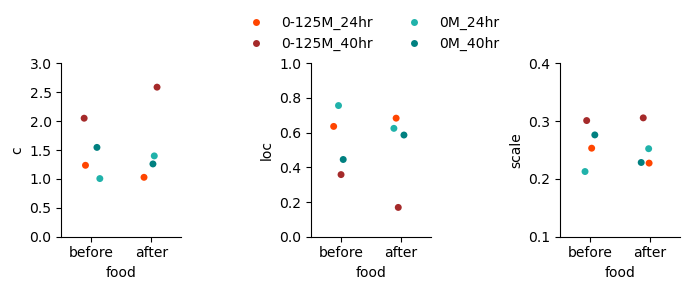

In [154]:
fig, axs = plt.subplots(1,3, figsize=(7,3))

vlims = [[0,3],[0,1],[.1,.4]]
for p, param in enumerate(['c','loc','scale']):
    sns.stripplot(data=dffitTurnRadAll, x='food', y=param, hue='condition', palette=cond_color, ax=axs[p], jitter=0.15)
    sns.despine()
    if p!=1: axs[p].legend([],[], frameon=False)
    else: sns.move_legend(axs[p], "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
    axs[p].set_ylim(vlims[p])
fig.tight_layout()
fig.savefig(plotDir+sep+'turnRadiusDistributionFitParams_'+postfix+'_FigS3K.pdf')

<a id='fig-s3l'></a>
## Fig. S3L - Same as S3G, H, but for the distribution of turn radii

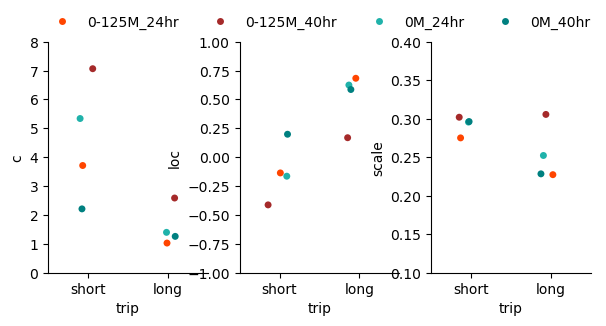

In [157]:
triptypes = trip_color.keys()
dffitTurnRadTrips = pd.DataFrame()
for c, cond in enumerate(conditions):
    fittedparamsall = np.nan*np.ones((3,len(triptypes)))
    for tt, triptype in enumerate(triptypes):
        plotcol = trip_color[triptype]
        querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & condition == "{cond}" & genotype == "{genotype}"'
        querystring = querystring + f' & after_which_visit {visitTH}'
        if triptype == 'very short':
            querystring = " & ".join([querystring, f'triptype_vs == "{triptype}"'])
        elif triptype == 'short':
            querystring = " & ".join([querystring, f'triptype == "{triptype}"'])
        per_move_postfood_df_filt = per_move_postfood_df.query(querystring)
        if len(per_move_postfood_df_filt) == 0: 
            continue
        datavec, fittedparams, best_fit_line = getModelDistributionParams(per_move_postfood_df_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
        fittedparamsall[:,tt] = fittedparams

    dffitTurnRad = pd.DataFrame(data=fittedparamsall.T, columns = ['c','loc','scale'])
    dffitTurnRad['trip'] = triptypes
    dffitTurnRad['condition'] = cond
    dffitTurnRad['genotype'] = genotype
    dffitTurnRadTrips = pd.concat([dffitTurnRadTrips,dffitTurnRad])
dffitTurnRadTrips = dffitTurnRadTrips.reset_index(drop=True).dropna()
dffitTurnRadTrips.to_csv(plotDir+sep+'turnRadiusDistribution_byTrip_'+postfix+'.csv', index=False)  

tps = dffitTurnRadTrips.trip.values
conds = dffitTurnRadTrips.condition.values
gens = dffitTurnRadTrips.genotype.values
dffitTurnRadTrips['gen-trip'] = [f'{tps[t]}\n{gens[t]}' for t in range(len(tps))]    

fig, axs = plt.subplots(1,3, figsize=(7,3))
vlims = [[0,8],[-1,1],[.1,.4]]
for p, param in enumerate(['c','loc','scale']):
    sns.stripplot(data=dffitTurnRadTrips, x='trip', y=param, hue='condition', palette=cond_color, ax=axs[p], jitter=0.15)
    axs[p].set_ylim(vlims[p])
    sns.despine()
    if p!=1: axs[p].legend([],[], frameon=False)
    else:  sns.move_legend(axs[p], "lower center",bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
#fig.tight_layout()
fig.savefig(plotDir+sep+'turnRadiusDistributionFitParams_triptype_'+postfix+'_FigS3L_.pdf')

<a id='fig-3i'></a>
## Fig. 3I-K, S3M-O - Change of run lengths, turn sizes and turn radii as a function of path distance from the last food visit (for sucrose and agarose trials)

In [158]:
visitTH = '>=1' #  This is an upper bound: ==0 --> before finding food spot, >=1 --> after finding food.
if visitTH == '==0': postfix = 'beforefood'
else: postfix = 'afterfood'
    
gen = per_move_postfood_df.genotype.values
conds = per_move_postfood_df.condition.values
per_move_postfood_df['cond-gen'] = [f'{gen[t]}\n{conds[t]}' for t in range(len(gen))]

#itterate through genotypes to fetch correct data
per_move_postfood_df_filt = pd.DataFrame()
for g, genotype in enumerate(genotypes):
    querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state}  & genotype == "{genotype}"'
    querystring = querystring + f' & after_which_visit {visitTH}'
    per_move_postfood_df_filt = pd.concat([per_move_postfood_df_filt,per_move_postfood_df.query(querystring)])

timebins = np.round(np.linspace(-0.5,3.5,9),2)
per_move_postfood_df_filt['dist_since_visit_log'] = np.log10(per_move_postfood_df_filt.dist_since_visit.values)
per_move_postfood_df_filt['dist_since_visit_log10_bin'] = pd.cut(per_move_postfood_df_filt.dist_since_visit_log.values, bins=timebins, precision=1, labels=False)

/var/folders/gb/rxw89fg930j2ydmv6n_0dmkw0000gn/T/ipykernel_2163/3344902793.py:17: RuntimeWarning: divide by zero encountered in log10
  per_move_postfood_df_filt['dist_since_visit_log'] = np.log10(per_move_postfood_df_filt.dist_since_visit.values)


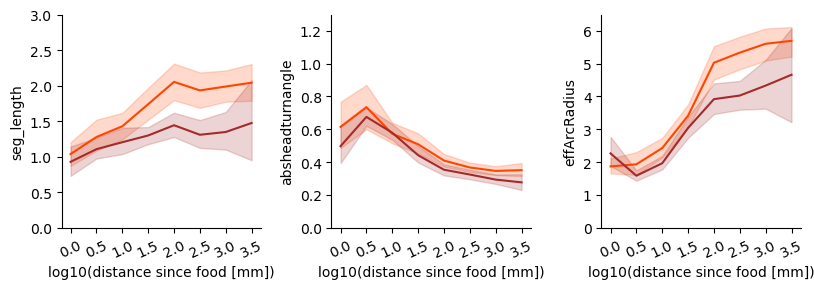

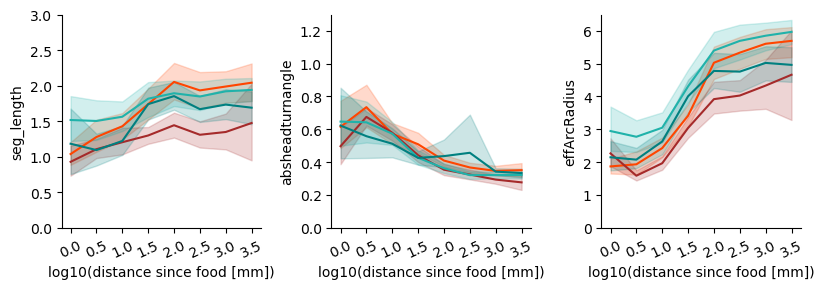

In [159]:
if postfix == 'afterfood':  #only makes sense after food
    pltdf = per_move_postfood_df_filt.groupby(['genotype','condition','cond-gen','flyid','dist_since_visit_log10_bin'],observed=False)[['seg_length','effArcRadius','absheadturnangle']].median().reset_index()
    
    qoi = ['seg_length','absheadturnangle','effArcRadius']
    ylims = [(0,3),(0,1.3),(0,6.5)]# #[(0,2.5),(0,1),(0,6.5)]# [(0.4,3),(0.2,1.5),(0,6.5)]#[(0.4,2.5),(0,6.5),(0.1,1.1)]
    
    fig, axs = plt.subplots(1,len(qoi),figsize=(2.75*len(qoi),3))

    for i, q in enumerate(qoi):
        ax = sns.lineplot(data = pltdf.query(f'condition in {conditions[:2]}'), x='dist_since_visit_log10_bin', y=q, hue='condition', palette=cond_color, ax=axs[i])
        ax.set_xticks(np.arange(len(timebins)-1));
        ax.set_xticklabels(timebins[1:],rotation = 25);
        #if i!=2: 
        ax.legend('', frameon=False)
        myAxisTheme(ax)
        ax.set_ylim(ylims[i])
        ax.set_xlabel('log10(distance since food [mm])')
    fig.tight_layout()
    fig.savefig(plotDir+sep+'distsincefood_locomotion_Fig3I-K.pdf')

    fig, axs = plt.subplots(1,len(qoi),figsize=(2.75*len(qoi),3))

    for i, q in enumerate(qoi):
        ax = sns.lineplot(data = pltdf.query(f'condition in {conditions}'), x='dist_since_visit_log10_bin', y=q, hue='condition', palette=cond_color, ax=axs[i])
        ax.set_xticks(np.arange(len(timebins)-1));
        ax.set_xticklabels(timebins[1:],rotation = 25);
        #if i!=2: 
        ax.legend('', frameon=False)
        myAxisTheme(ax)
        ax.set_ylim(ylims[i])
        ax.set_xlabel('log10(distance since food [mm])')
    fig.tight_layout()
    fig.savefig(plotDir+sep+'distsincefood_locomotion_FigS3M-O.pdf')

<a id='fig-3b'></a>
## Fig. 3B - Probability distribution of turn radii for short and long trips in 24-h-starved wild type flies

In [169]:
etho_state = [1] # turns
#itterate through genotypes to fetch correct data
means_tmp = pd.DataFrame()
counts_tmp = pd.DataFrame()
for g, genotype in enumerate(genotypes):
    querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & genotype == "{genotype}"'
    querystring = querystring + f' & after_which_visit {visitTH}'
    if len(genotypes) > 1 :
        querystring = querystring + f'& condition == "{conditions[0]}"'
    print(genotype)
    print(querystring)
    means_tmp = pd.concat([means_tmp,perMoveSegDF.query(querystring)])
    counts_tmp = pd.concat([counts_tmp,perMoveSegDF.query(querystring)])

keep_indices = ['genotype','condition','fly','after_which_visit']
means = means_tmp.groupby(keep_indices)['ifCW'].mean().reset_index()
counts = counts_tmp.groupby(keep_indices)['ifCW'].count().reset_index()
perMoveSegDF_filt = pd.merge(means,counts,on=keep_indices)
perMoveSegDF_filt = perMoveSegDF_filt.rename(columns={"ifCW_x": "ifCW", "ifCW_y": "turnCount"})
#rescale turn bias
perMoveSegDF_filt['ifCWplt'] = 2*(perMoveSegDF_filt.ifCW.values-0.5)
perMoveSegDF_filt = perMoveSegDF_filt.query('turnCount >= 3')

CantonSMH
seg_state in [2, 3, 4, 5] & etho_state == [1] & genotype == "CantonSMH" & after_which_visit >=1


CantonSMH
condition in ['0-125M_24hr', '0-125M_40hr'] & seg_state in [2, 3, 4, 5] & etho_state == [1] & after_which_visit >=1


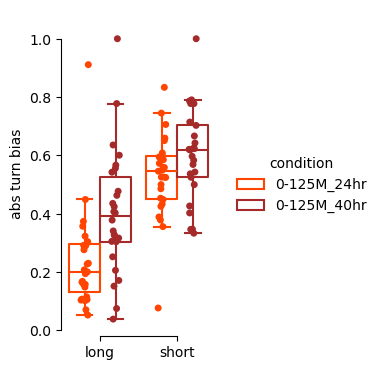

In [170]:
keep_indices = ['genotype','condition','flyid','triptype','after_which_visit']
slctConds = conditions[:2]
querystring = f'condition in {slctConds} & seg_state in {[2,3,4,5]} & etho_state == {etho_state} & after_which_visit {visitTH}'
print(genotype)
print(querystring)
means = per_move_postfood_df.query(querystring).groupby(keep_indices)['ifCW'].mean().reset_index()
counts = per_move_postfood_df.query(querystring).groupby(keep_indices)['ifCW'].count().reset_index()
per_move_postfood_df_filt = pd.merge(means,counts,on=keep_indices)
per_move_postfood_df_filt = per_move_postfood_df_filt.rename(columns={"ifCW_x": "ifCW", "ifCW_y": "turnCount"})
#rescale turn bias
#per_move_postfood_df_filt['ifCW'] = 2*(per_move_postfood_df_filt.ifCW.values-0.5)
per_move_postfood_df_filt = per_move_postfood_df_filt.query('turnCount >= 3')
per_move_postfood_df_filt['abs_ifCW'] = np.abs(per_move_postfood_df_filt.ifCW.values -0.5)*2

tmp = per_move_postfood_df_filt.groupby(['genotype','condition','flyid','triptype'])['abs_ifCW'].mean().reset_index()
g=sns.catplot(
    data=tmp, x="triptype", y="abs_ifCW", hue="condition",
    kind="box", fill=False, dodge=True, fliersize=0, aspect=.6, height=4, palette=cond_color
)
g.map_dataframe(sns.stripplot, x="triptype", y="abs_ifCW", hue="condition", dodge=True, palette=cond_color)
g.set_axis_labels("", 'abs turn bias')
#g.set_xticklabels(rotation=30)
g.set(ylim=(-0.02,1.1))
g.despine(trim=True)
#g.savefig(plotDir+sep+'absturnBias_perfly_afterfood-bytriptype_Fig3B.pdf')

<a id='fig-s3b'></a>
## Fig. S3B - Probability distribution of turn radii for short and long trips in 24-h-starved wild type flies

CantonSMH
condition in ['0-125M_24hr', '0-125M_40hr', '0M_24hr', '0M_40hr'] & seg_state in [2, 3, 4, 5] & etho_state == [1] & after_which_visit >=1


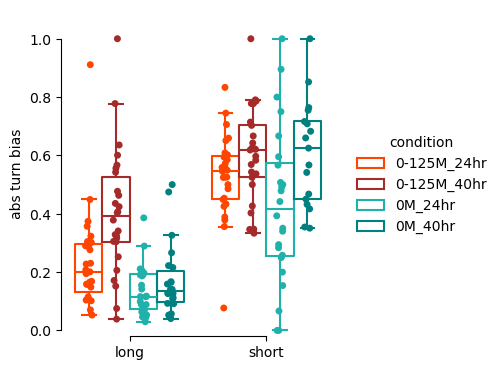

In [171]:
slctConds = conditions[:]
querystring = f'condition in {slctConds} & seg_state in {[2,3,4,5]} & etho_state == {etho_state} & after_which_visit {visitTH}'
print(genotype)
print(querystring)
means = per_move_postfood_df.query(querystring).groupby(keep_indices)['ifCW'].mean().reset_index()
counts = per_move_postfood_df.query(querystring).groupby(keep_indices)['ifCW'].count().reset_index()
per_move_postfood_df_filt = pd.merge(means,counts,on=keep_indices)
per_move_postfood_df_filt = per_move_postfood_df_filt.rename(columns={"ifCW_x": "ifCW", "ifCW_y": "turnCount"})
#rescale turn bias
#per_move_postfood_df_filt['ifCW'] = 2*(per_move_postfood_df_filt.ifCW.values-0.5)
per_move_postfood_df_filt = per_move_postfood_df_filt.query('turnCount >= 3')
per_move_postfood_df_filt['abs_ifCW'] = np.abs(per_move_postfood_df_filt.ifCW.values -0.5)*2

tmp = per_move_postfood_df_filt.groupby(['genotype','condition','flyid','triptype'])['abs_ifCW'].mean().reset_index()
g=sns.catplot(
    data=tmp, x="triptype", y="abs_ifCW", hue="condition",
    kind="box", fill=False, color='black',dodge=True, fliersize=0, aspect=.9, height=4, palette=cond_color
)
g.map_dataframe(sns.stripplot, x="triptype", y="abs_ifCW", hue="condition", dodge=True, palette=cond_color)
g.set_axis_labels("", 'abs turn bias')
#g.set_xticklabels(rotation=30)
g.set(ylim=(-0.02,1.1))
g.despine(trim=True)
#g.savefig(plotDir+sep+'absturnBias_perfly_afterfood-bytriptype_allconds_FigS3B.pdf')

<a id='fig-s3c'></a>
## Fig. S3C - Probability distribution of turn radii for short and long trips in 24-h-starved wild type flies

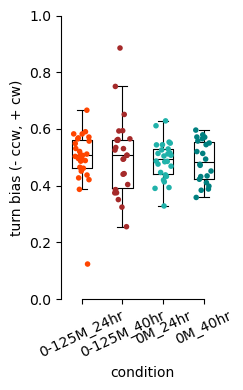

In [172]:
plotdf = perMoveSegDF_filt.copy()
gen = plotdf.genotype.values
conds = plotdf.condition.values
plotdf['cond-gen'] = [f'{gen[t]}\n{conds[t]}' for t in range(len(gen))]

fig, axs = plt.subplots(1,1,figsize=(2.5,4))
if len(genotypes)==1 :
    plotdf = plotdf.groupby(['genotype','condition','fly'])['ifCW'].mean().reset_index()
    sns.stripplot(plotdf, x='condition', y='ifCW', hue='condition',palette=cond_color, ax=axs, size=4, jitter=.2)
    sns.boxplot(plotdf, x='condition', y='ifCW', dodge=False, legend=False,fill=False, fliersize=0, width=0.5)
    axs.set_xticks(range(len(conditions))) 
else:
    plotdf = plotdf.groupby(['genotype','cond-gen','fly'])['ifCW'].mean().reset_index()
    sns.stripplot(plotdf, x='cond-gen', y='ifCW', hue='genotype', palette=pal, ax=axs, size=4, jitter=.2)
    sns.boxplot(plotdf, x='cond-gen', y='ifCW', dodge=False, legend=False,fill=False, fliersize=0, width=0.5)
    axs.set_xticks(range(len(plotdf['cond-gen'].unique()))) 
plt.setp(axs.lines, color='k',linewidth=0.8)
axs.set_xticklabels(axs.get_xticklabels(),rotation = 25);
axs.set_ylabel('turn bias (- ccw, + cw)')
axs.set_ylim(0,1)
sns.despine(trim=True)
axs.legend('',frameon=False)
fig.tight_layout()
#fig.savefig(plotDir+sep+'turnBias_'+postfix+'_FigS3C.pdf')

In [ ]:
plotdf = perMoveSegDF_filt.copy()
plotdf['abs_ifCW'] = np.abs(plotdf.ifCW.values -0.5)*2
plotdf['cond-gen'] = [f'{gen[t]}\n{conds[t]}' for t in range(len(gen))]
fig, axs = plt.subplots(1,1,figsize=(3,4))

tmp = plotdf.groupby(['genotype','condition','fly'])['abs_ifCW'].mean().reset_index()
sns.stripplot(tmp, x='condition', y='abs_ifCW', hue='condition',palette=cond_color, ax=axs, size=4, jitter=.2)
sns.boxplot(tmp, x='condition', y='abs_ifCW', dodge=False, legend=False,fill=False, fliersize=0, width=0.5)
axs.set_xticks(range(len(conditions)))
absTurnBiasMedians = tmp.groupby(['genotype','condition'])[['abs_ifCW']].median().reset_index()

plt.setp(axs.lines, color='k',linewidth=0.8)
axs.set_xticklabels(axs.get_xticklabels(),rotation = 25);
axs.set_ylabel('abs turn bias')
axs.set_ylim(-0.02,1.2)
sns.despine(trim=True)
axs.legend('',frameon=False)
fig.tight_layout()
#fig.savefig(plotDir+sep+'absturnBias_perfly_'+postfix+'.pdf')
#absTurnBiasMedians.to_csv(plotDir+sep+'absturnBiasMedians_'+postfix+'.csv', index=False)  
#plotdf.to_csv(plotDir+sep+'absturnBias_'+postfix+'.csv', index=False)  

<a id='fig-s3a'></a>
## Fig. S3A - Absolute turn bias for all wild type experimental groups, calculated per fly before (left) and after (right) the first visit to the food spot

,groupA,groupB,test,stat,p-value,stars
0,"after, 0-125M_24hr","after, 0-125M_40hr",scipy.stats.ranksums,-3.437864,5.863213e-04,***
1,"after, 0-125M_24hr","after, 0M_24hr",scipy.stats.ranksums,3.626891,2.868544e-04,***
2,"after, 0-125M_24hr","after, 0M_40hr",scipy.stats.ranksums,2.832381,4.620280e-03,**
3,"after, 0-125M_40hr","after, 0M_24hr",scipy.stats.ranksums,5.686315,1.298095e-08,****
4,"after, 0-125M_40hr","after, 0M_40hr",scipy.stats.ranksums,4.884168,1.038667e-06,****
5,"after, 0M_24hr","after, 0M_40hr",scipy.stats.ranksums,-0.585598,5.581456e-01,ns
6,"before, 0-125M_24hr","before, 0-125M_40hr",scipy.stats.ranksums,0.706584,4.798253e-01,ns
7,"before, 0-125M_24hr","before, 0M_24hr",scipy.stats.ranksums,1.372589,1.698801e-01,ns
8,"before, 0-125M_24hr","before, 0M_40hr",scipy.stats.ranksums,2.375181,1.754036e-02,*
9,"before, 0-125M_40hr","before, 0M_24hr",scipy.stats.ranksums,0.640636,5.217593e-01,ns


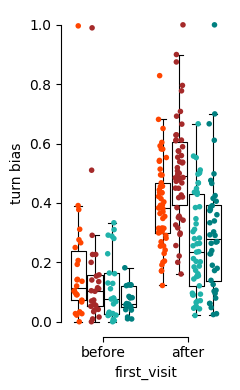

In [33]:
PANEL = 'S3A'

# plot colors
condcolors = {'0-125M_24hr': 'orangered', 
              '0-125M_40hr': 'brown',
              '0M_24hr': 'lightseagreen',
              '0M_40hr':'teal',
              '24hr': 'orangered', 
              '40hr': 'brown',}
trip_color = {
    'short': 'mediumpurple',
    'long': 'teal'
}

"""
STATS
"""

stats_df = {'groupA': [], 'groupB': [], 'test': [], 'stat': [], 'p-value': [], 'stars': []}

"""
Stars, Significance Level, P-value
ns, Not significant, P>0.05
*, Significant, P<=0.05
**, Highly significant, P<=0.01
***, Very highly significant, P<=0.001
****, Extremely highly significant, P<= 0.0001
"""
def get_stars(p):
    if p <= 0.0001:
        return '****'
    elif p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    else:
        return 'ns'

#print('Comparison between conditions ===')
conditions = plotdf.condition.unique()
for each in plotdf.first_visit.unique():
    for pair in combinations(conditions, 2):
        
        a, b = pair
        A, B = plotdf.loc[(plotdf.condition == a)&(plotdf.first_visit == each)].abs_ifCW.values, plotdf.loc[(plotdf.condition == b)&(plotdf.first_visit == each)].abs_ifCW.values
        s, pval = stats.ranksums(A,B)
        #print(f'({each}): pval={pval:3.3e}')
        stats_df['groupA'].append(f'{each}, {a}')
        stats_df['groupB'].append(f'{each}, {b}')
        stats_df['test'].append('scipy.stats.ranksums')
        stats_df['stat'].append(s)
        stats_df['p-value'].append(pval)
        stats_df['stars'].append(get_stars(pval))

#print('Comparison before vs after visit ===')
for each in plotdf.condition.unique():
    A, B = plotdf.loc[(plotdf.first_visit == 'before')&(plotdf.condition == each)].abs_ifCW.values, plotdf.loc[(plotdf.first_visit == 'after')&(plotdf.condition == each)].abs_ifCW.values
    s, pval = stats.ranksums(A,B)
    #print(f'({each}): pval={pval:3.3e}')
    stats_df['groupA'].append(f'{each}, before')
    stats_df['groupB'].append(f'{each}, after')
    stats_df['test'].append('scipy.stats.ranksums')
    stats_df['stat'].append(s)
    stats_df['p-value'].append(pval)
    stats_df['stars'].append(get_stars(pval))
    
stats_df = pd.DataFrame(stats_df)
display(stats_df)
### save source data and stats
plotdf.to_csv(op.join(plotDir, f'sourcedata_fig{PANEL}.csv'), index=False)
stats_df.to_csv(op.join(plotDir, f'stats_fig{PANEL}.csv'), index=False)

"""
PLOTTING
"""
fig, axs = plt.subplots(1,1,figsize=(2.5,4))
sns.stripplot(plotdf, x='first_visit', y='abs_ifCW', order=labels, hue='condition',palette=condcolors, ax=axs, 
              size=4, jitter=.2, dodge=True)
sns.boxplot(plotdf, x='first_visit', y='abs_ifCW', order=labels, hue='condition',palette=condcolors, dodge=True, 
            legend=False,fill=False, fliersize=0, width=.8, gap=0.1)
plt.setp(axs.lines, color='k',linewidth=0.8)
axs.set_ylabel('turn bias')

#axs.legend(False)
sns.despine(trim=True)
axs.get_legend().remove()
fig.tight_layout()
plt.show()
#plt.legend(frameon=False, loc=1)
fig.savefig(op.join(plotDir, f'plot_fig{PANEL}.pdf'),dpi=300)